In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix/psix/')
import psix

In [2]:
psix_object = psix.Psix()
psix_object.process_smartseq(
        'data/sj_counts.tab.gz',
        'data/constitutive_introns.gz',
        'data/tpm.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)
psix_object.get_cell_metric(latent='data/pc2_rd.tab.gz', n_neighbors = 100, weight_metric=True)
psix_object.compute_psix_scores(n_jobs=20, n_random_exons=2000)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...


  0%|          | 5/1197 [00:00<00:25, 46.50it/s]

Successfully processed smart-seq data


100%|██████████| 2019/2019 [00:18<00:00, 106.86it/s]


Successfully ran Psix on exons.
...

Estimating p-values


100%|██████████| 25/25 [16:52<00:00, 40.51s/it]  


In [5]:
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/analysis_psix/utils/')
from misc_utils import *

In [6]:
psix_results = psix_object.psix_results.copy()
psix_results['bins'] = ['']*2019

for mean in psix_object.bins.keys():
    for var in psix_object.bins[mean].keys():
        for exon in psix_object.bins[mean][var]:
            psix_results.loc[exon, 'bins'] = mean +'_' + var

100%|██████████| 2019/2019 [00:11<00:00, 168.77it/s]


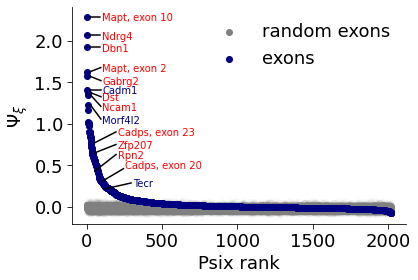

In [7]:
fig = plt.figure()
ax  = plt.subplot(1,1,1)
i = 1

ax.scatter([100], [-0.05], c='gray', label='random exons')

for mean_var in tqdm(psix_results.sort_values('psix_score')[::-1].bins):
    mean = mean_var[:6]
    var = mean_var[7:]
    subset = np.random.choice(psix_object.random_scores[mean][var], 50, replace=False)
    ax.scatter([i]*50, subset, c='gray', alpha=0.02)
    i += 1


plt.text(100, psix_results.loc['Mapt_1'].psix_score-0.05, 'Mapt, exon 10', c='red')   
plt.plot([20, 90], [psix_results.loc['Mapt_1'].psix_score, psix_results.loc['Mapt_1'].psix_score],c='black')

plt.text(100, psix_results.loc['Ndrg4_1'].psix_score-0.05, 'Ndrg4', c='red')   
plt.plot([20, 90], [psix_results.loc['Ndrg4_1'].psix_score, psix_results.loc['Ndrg4_1'].psix_score],c='black')

plt.text(100, psix_results.loc['Dbn1_1'].psix_score-0.05, 'Dbn1', c='red')   
plt.plot([20, 90], [psix_results.loc['Dbn1_1'].psix_score, psix_results.loc['Dbn1_1'].psix_score],c='black')

plt.text(104, psix_results.loc['Mapt_3'].psix_score, 'Mapt, exon 2', c='red')    
plt.plot([24, 94], [psix_results.loc['Mapt_3'].psix_score, psix_results.loc['Mapt_3'].psix_score+0.05],c='black')
plt.text(105, psix_results.loc['Gabrg2_1'].psix_score-0.1, 'Gabrg2', c='red')   
plt.plot([25, 95], [psix_results.loc['Gabrg2_1'].psix_score, psix_results.loc['Gabrg2_1'].psix_score-0.05],c='black')



plt.text(104, psix_results.loc['Cadm1_10'].psix_score-0.05, 'Cadm1', c='navy')    
plt.plot([24, 94], [psix_results.loc['Cadm1_10'].psix_score, psix_results.loc['Cadm1_10'].psix_score],c='black')
plt.text(105, psix_results.loc['Dst_5'].psix_score-0.1, 'Dst', c='red')   
plt.plot([25, 95], [psix_results.loc['Dst_5'].psix_score, psix_results.loc['Dst_5'].psix_score-0.05],c='black')


plt.text(104, psix_results.loc['Ncam1_6'].psix_score-0.19, 'Ncam1', c='red')    
plt.plot([24, 94], [psix_results.loc['Ncam1_6'].psix_score, psix_results.loc['Ncam1_6'].psix_score-0.14],c='black')
plt.text(105, psix_results.loc['Morf4l2_7'].psix_score-0.22, 'Morf4l2', c='navy')   
plt.plot([25, 95], [psix_results.loc['Morf4l2_7'].psix_score, psix_results.loc['Morf4l2_7'].psix_score-0.17],c='black')

plt.text(305, psix_results.loc['Tecr_6'].psix_score+0.02, 'Tecr', c='navy')   
plt.plot([125, 295], [psix_results.loc['Tecr_6'].psix_score, psix_results.loc['Tecr_6'].psix_score+0.07],c='black')

plt.text(205, psix_results.loc['Rpn2_3'].psix_score+0.15, 'Rpn2', c='red')   
plt.plot([55, 195], [psix_results.loc['Rpn2_3'].psix_score, psix_results.loc['Rpn2_3'].psix_score+0.2],c='black')


plt.text(255, psix_results.loc['Cadps_2'].psix_score+0.15, 'Cadps, exon 20', c='red')   
plt.plot([105, 245], [psix_results.loc['Cadps_2'].psix_score, psix_results.loc['Cadps_2'].psix_score+0.15],c='black')

plt.text(205, psix_results.loc['Cadps_7'].psix_score+0.08, 'Cadps, exon 23', c='red')   
plt.plot([55, 195], [psix_results.loc['Cadps_7'].psix_score, psix_results.loc['Cadps_7'].psix_score+0.13],c='black')

plt.text(205, psix_results.loc['Zfp207_1'].psix_score+0.05, 'Zfp207', c='red')   
plt.plot([55, 195], [psix_results.loc['Zfp207_1'].psix_score, psix_results.loc['Zfp207_1'].psix_score+0.1],c='black')




ax.scatter(np.arange(1, len(psix_results.index)+1), psix_results.sort_values('psix_score')[::-1].psix_score, c = 'navy',
          label='exons')
    
plt.xlabel('Psix rank', fontsize=18)
plt.ylabel(r'$\Psi_{\xi}$', fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(labelsize=18, length=5)
# plt.title('Neurogenesis exons', fontsize=18)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
plt.legend(frameon=False, fontsize=18)

In [8]:
tiklova_rd = pd.read_csv('data/pc2_rd.tab.gz', sep='\t', index_col=0)
from importlib import reload
# reload(get_elife_tests)

sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/sc_splicing_regulation/utils/')
from utils_functions import *
import utils_functions as uf
reload(uf)

weyn_pvals = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_pvals.tab', sep='\t', index_col=0)
weyn_fdr = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_fdr.tab', sep='\t', index_col=0)
weyn_psi = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_psi.tab', sep='\t', index_col=0)

weyn_ds = get_averages_bulk(weyn_psi)
# tiklova_kw = pd.read_csv('~/sc_splicing_regulation/sc_neurogenesis/tiklova_neurogenesis_kw.tab', 
#                                 sep='\t', index_col=0)

# tiklova_kw, tiklova_kw_1, tiklova_kw_25, tiklova_elife = uf.get_elife_tests(tiklova_rd, psix_object.adata.uns['psi'].T, 
#                                                             psix_object.adata.uns['mrna_per_event'].T, 
#                                                                          psix_results, n_clusters = 5)

tiklova_geary = pd.read_csv(
    '~/sc_splicing_regulation/sc_neurogenesis/tiklova_neurogenesis_autocorr/tiklova_GearyC_k100.tab',
    sep='\t', index_col=0)

tiklova_geary2 = pd.read_csv(
    'old/geary_c/tiklova_GearyC_scvi3.tab',
    sep='\t', index_col=0)

from statsmodels.stats.multitest import multipletests

tiklova_geary['qvals'] = multipletests(tiklova_geary.pval, method='fdr_bh')[1]
tiklova_geary2['qvals'] = multipletests(tiklova_geary2.pval, method='fdr_bh')[1]

In [9]:
tiklova_meta = pd.read_csv('~/data_sc_regulation/tiklova/SraRunTable.txt', sep=',', index_col=0)

e13 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 13.5'] & tiklova_rd.index
e15 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 15.5'] & tiklova_rd.index
e18 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 18.5'] & tiklova_rd.index
p1 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 1'] & tiklova_rd.index
p7 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 7'] & tiklova_rd.index
p90 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 90'] & tiklova_rd.index

tiklova_labels = [e13, e15, e18, p1, p7, p90]


tiklova_kw_labels = run_kw_dset(psix_object.adata.uns['psi'].T, tiklova_labels, psix_results.index)

one_v_one = 'brie2/label_v_label/'
tiklova_0v1 = pd.read_csv(one_v_one + 'l0v1.brie_quant_cell.brie_ident.tsv.gz', sep='\t', index_col=0)
tiklova_0v2 = pd.read_csv(one_v_one + 'l0v2.brie_quant_cell.brie_ident.tsv.gz', sep='\t', index_col=0)
tiklova_0v3 = pd.read_csv(one_v_one + 'l0v3.brie_quant_cell.brie_ident.tsv.gz', sep='\t', index_col=0)
tiklova_0v4 = pd.read_csv(one_v_one + 'l0v4.brie_quant_cell.brie_ident.tsv.gz', sep='\t', index_col=0)
tiklova_0v5 = pd.read_csv(one_v_one + 'l0v5.brie_quant_cell.brie_ident.tsv.gz', sep='\t', index_col=0)



tiklova_brie_pseudo = pd.read_csv('brie2/pseudotime/brie_quant_cell.brie_ident.tsv.gz', 
                                  sep='\t', index_col=0)

tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_pval
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_pval
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_pval
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_pval
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_pval
tiklova_ovo = tiklova_one_v_one.min(axis=1)

In [9]:
kw_results = pd.DataFrame()
kw_score = []
kw_pval = []
for exon in tqdm(psix_results.index, position=0, leave=True):
    exon_psi = psix_object.adata.uns['psi'].T.loc[exon]
    sample_list = []
    for label in tiklova_labels:
        label_psi = list(exon_psi.loc[label].dropna())
        if len(label_psi) > 0:
            sample_list.append(label_psi)
    score, pval = uf.run_anova(sample_list)
    kw_score.append(score)
    kw_pval.append(pval)
    
kw_results['score'] = kw_score
kw_results['pvals'] = kw_pval
kw_results['qvals'] = multipletests(kw_results.pvals, method='fdr_bh')[1]
kw_results.index = psix_results.index

100%|██████████| 2019/2019 [00:16<00:00, 122.78it/s]


In [10]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score

weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.05)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.2) | (weyn_fdr.min(axis=1) > 0.05)]

exons = psix_results.index & tiklova_geary2.index & tiklova_geary.index & tiklova_ovo.index & tiklova_brie_pseudo.index & tiklova_kw_labels.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
# psix_scvi5_auc = []
# psix_pc_auc = []
gearyc_auc = []
gearyc2_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(200)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_geary.index) + [0]*len(pd.Index(neg_choice) & tiklova_geary.index)
    c_y = list((tiklova_geary.loc[pd.Index(pos_choice) & tiklova_geary.index].pval <= 0.05).astype(int)) + list((tiklova_geary.loc[pd.Index(neg_choice) & tiklova_geary.index].pval <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc_auc.append(f1)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_geary2.index) + [0]*len(pd.Index(neg_choice) & tiklova_geary2.index)
    c_y = list((tiklova_geary2.loc[pd.Index(pos_choice) & tiklova_geary2.index].pval <= 0.05).astype(int)) + list((tiklova_geary2.loc[pd.Index(neg_choice) & tiklova_geary2.index].pval <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc2_auc.append(f1)
    
    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list((psix_results.loc[pos_choice].pvals <= 0.05).astype(int)) + list((psix_results.loc[neg_choice].pvals <= 0.05).astype(int))
    psix_auc.append(f1_score(y, psix_y))
    
#     y = [1]*len(pos_choice) + [0]*len(neg_choice)
#     psix_y = list((psix_results_scvi5.loc[pos_choice].pvals <= 0.05).astype(int)) + list((psix_results_scvi5.loc[neg_choice].pvals <= 0.05).astype(int))
#     psix_scvi5_auc.append(f1_score(y, psix_y))
    
#     y = [1]*len(pos_choice) + [0]*len(neg_choice)
#     psix_y = list((psix_results_pca.loc[pos_choice].pvals <= 0.05).astype(int)) + list((psix_results_pca.loc[neg_choice].pvals <= 0.05).astype(int))
#     psix_pc_auc.append(f1_score(y, psix_y))
    
    kw_y = list((tiklova_kw_labels.loc[pos_choice].pvals <= 0.05).astype(int)) + list((tiklova_kw_labels.loc[neg_choice].pvals <= 0.05).astype(int))
    kw_auc.append(f1_score(y, kw_y))
    
    r_y = list((tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]<=0.05).astype(int)) + list((tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]]<=0.05).astype(int))
    brie_l_auc.append(f1_score([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y))
    #####
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_brie_pseudo.index) + [0]*len(pd.Index(neg_choice) & tiklova_brie_pseudo.index)
    brie_y = list((tiklova_brie_pseudo.loc[pd.Index(pos_choice) & tiklova_brie_pseudo.index].neuro_pval<=0.05).astype(int)) + list((tiklova_brie_pseudo.loc[pd.Index(neg_choice) & tiklova_brie_pseudo.index].neuro_pval<=0.05).astype(int))
    briep_auc.append(f1_score(y, brie_y))
    



100%|██████████| 200/200 [00:11<00:00, 18.15it/s]


Text(0.5, 1.0, 'Tiklova dataset, strict negatives')

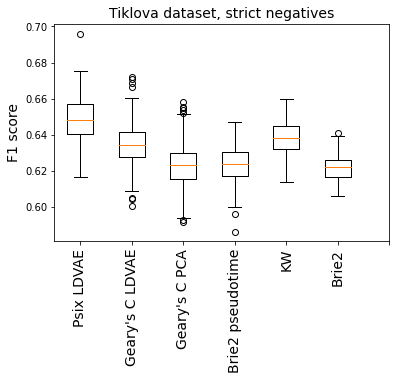

In [11]:
tiklova_boxplots = [ psix_auc, #psix_scvi5_auc, 
#                     psix_pc_auc, 
                    gearyc2_auc, gearyc_auc, briep_auc, kw_auc, brie_l_auc]


bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 8), 
           ['Psix LDVAE', #'Psix LDVAE, no correction', 
#             'Psix PCA', 
            "Geary's C LDVAE", "Geary's C PCA", 
            'Brie2 pseudotime', 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('F1 score', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Tiklova dataset, strict negatives', fontsize=14)

Text(0, 0.5, 'PC2')

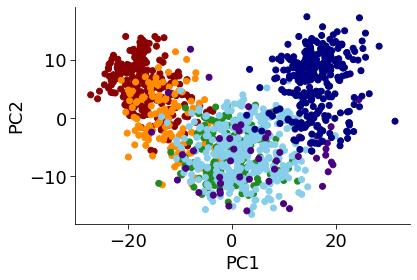

In [12]:
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
colores = []
for cell in tiklova_meta.loc[tiklova_rd.index].Age:
    if cell == 'embryonic day 13.5':
        colores.append('darkred')
    if cell == 'embryonic day 15.5':
        colores.append('darkorange')
    if cell == 'embryonic day 18.5':
        colores.append('forestgreen')
    if cell == 'postnatal day 1':
        colores.append('skyblue')
    if cell == 'postnatal day 7':
        colores.append('indigo')
    if cell == 'postnatal day 90':
        colores.append('navy')
        
pc = PCA(2).fit_transform(tiklova_rd)
fig = plt.figure(figsize=(6, 4))
ax  = plt.subplot(1,1,1)
ax.scatter(tiklova_rd.PC_1, tiklova_rd.PC_2, c=colores)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.tick_params(labelsize=18, length=5)
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)

In [13]:
tiklova_psi = psix_object.adata.uns['psi'].T.copy()

Text(0, 0.5, 'PC2 of LDVAE space')

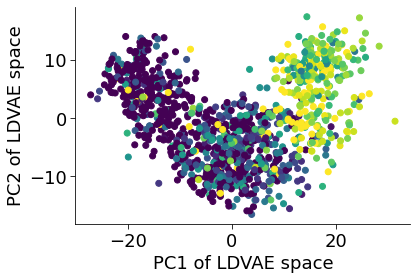

In [15]:
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
colores = []
for cell in tiklova_meta.loc[tiklova_rd.index].Age:
    if cell == 'embryonic day 13.5':
        colores.append('darkred')
    if cell == 'embryonic day 15.5':
        colores.append('darkorange')
    if cell == 'embryonic day 18.5':
        colores.append('forestgreen')
    if cell == 'postnatal day 1':
        colores.append('skyblue')
    if cell == 'postnatal day 7':
        colores.append('indigo')
    if cell == 'postnatal day 90':
        colores.append('navy')
        
pc = PCA(2).fit_transform(tiklova_rd)
fig = plt.figure(figsize=(6, 4))
ax  = plt.subplot(1,1,1)
ax.scatter(pc.T[0], pc.T[1], c=tiklova_psi.loc['Clta_4'])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.tick_params(labelsize=18, length=5)
plt.xlabel('PC1 of LDVAE space', fontsize=18)
plt.ylabel('PC2 of LDVAE space', fontsize=18)

In [133]:
# tiklova_rd = pd.read_csv('data/scvi3_rd.tab.gz', sep='\t', index_col=0)


In [16]:
psix_object.compute_neighbors_psi()#latent='data/pc2_rd.tab.gz', n_neighbors=100, remove_self=False)

slicing exons...


100%|██████████| 2019/2019 [00:05<00:00, 402.46it/s]

Successfully computed neighbors


In [49]:
psix_object.save_psix_object()

In [18]:
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix/utils')
import psix_functions as pr

from scipy.special import logit, expit
import hotspot
W = pr.get_distance_matrix(tiklova_rd, k=101)

for exon in W.index:
    W.loc[exon, exon] = 1
    



exon_list = psix_results.loc[(psix_results.psix_score > 0) & (psix_results.qvals <= 0.05)].index
# background_psi = get_background(psix_object.adata.uns['psi'].T, W, exon_list)
# background_psi.to_csv('data/background_psi_scvi5_batch.tab.gz', sep='\t', index=True, header=True)

  0%|          | 5/1197 [00:00<00:29, 40.32it/s]

Changed cross function


100%|██████████| 1197/1197 [00:25<00:00, 47.85it/s]


In [46]:
psix_object.adata.uns

OverloadedDict, wrapping:
	OrderedDict([('psi',             Aamdc_10   Aamdc_9  Aamdc_nmdSE_2  Aasdhppt_2    Abat_3  Abca3_4  \
SRR7408400  0.000000  1.000000            0.0         NaN       NaN      NaN   
SRR7408401       NaN       NaN            NaN         1.0       NaN      NaN   
SRR7408404  1.000000       NaN            NaN         NaN       NaN      NaN   
SRR7408413       NaN       NaN            NaN         1.0       NaN      NaN   
SRR7408414       NaN       NaN            NaN         NaN       NaN      1.0   
...              ...       ...            ...         ...       ...      ...   
SRR7410092  1.000000  1.000000            0.0         1.0  0.741935      NaN   
SRR7410093  1.000000  1.000000            NaN         1.0  1.000000      1.0   
SRR7410094  1.000000  1.000000            0.0         1.0  1.000000      NaN   
SRR7410096  0.882353  0.833333            0.0         1.0  1.000000      1.0   
SRR7410097  1.000000  1.000000            0.0         1.0       NaN     

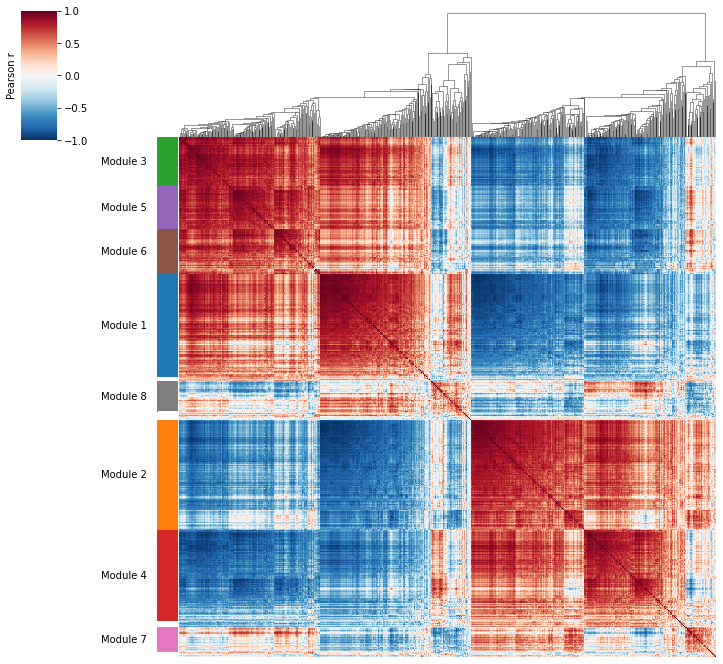

In [48]:
background_psi = psix_object.adata.uns['neighbors_psi'].T

bwow = compute_modules(background_psi.loc[exon_list].T.corr().fillna(0), 
                min_gene_threshold=30, fdr_threshold=None, z_threshold=0.3, core_only=False)

aver = local_correlation_plot(
            background_psi.loc[exon_list].T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False
)

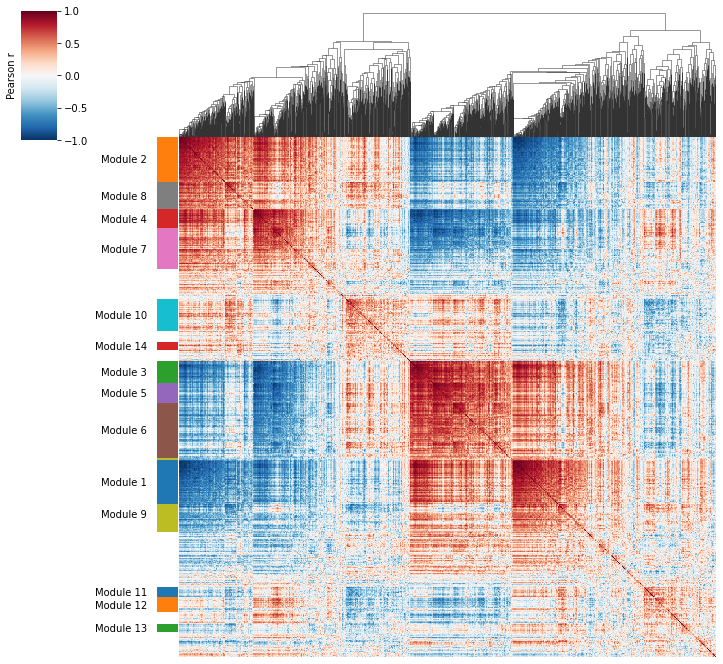

In [47]:
backgrounds_psi = psix_object.adata.uns['neighbors_psi'].T
bwow = compute_modules(backgrounds_psi.T.corr().fillna(0), 
                min_gene_threshold=30, fdr_threshold=None, z_threshold=0.3, core_only=False)

aver = local_correlation_plot(
            background_psi.T.corr().fillna(0), bwow[0], bwow[1],
            mod_cmap='tab10', vmin=-1, vmax=1,
            z_cmap='RdBu_r', yticklabels=False
)

In [21]:
motif_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/meme_motifs/'
mouse_motifs_exons = pd.read_csv(motif_dir + 'mouse_rbp.exons.tab', sep='\t', index_col=0)
mouse_motifs_ase = pd.read_csv(motif_dir + 'mouse_rbp.ase.tab', sep='\t', index_col=0)

human_motifs_exons = pd.read_csv(motif_dir + 'human_rbp.exons.tab', sep='\t', index_col=0)
human_motifs_ase = pd.read_csv(motif_dir + 'human_rbp.ase.tab', sep='\t', index_col=0)

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'
mouse_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_mRBP.tab', sep='\t', index_col=0)
mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova_hRBP/'
human_clip_predicted = pd.read_csv(clip_dir + 'peaks_predicted_hRBP.tab', sep='\t', index_col=0)

human_clip_predicted = (human_clip_predicted.loc[[x for x in human_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
human_clip_predicted.index= [x[:-3] for x in human_clip_predicted.index if x[-3:]=='_se']

clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'

mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)

mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']


mouse_clip_peaks = pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0)
exon_lengths = pd.read_csv('~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/exon_lengths.tab', sep='\t',
                           index_col=0, names=['exon', 'ase', 'length']).loc[mouse_clip_peaks.index]
exon_lengths.index == mouse_clip_peaks.index

mouse_clip_overlap = mouse_clip_peaks.divide(exon_lengths.length, axis=0)


mouse_clip_overlap = mouse_clip_overlap.loc[[x for x in mouse_clip_overlap.index if x[-3:]=='_se']]
mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

mouse_clip_overlap.index= [x[:-3] for x in mouse_clip_overlap.index if x[-3:]=='_se']
mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

exons_sorted = psix_results.loc[mouse_clip_overlap.index & psix_results.index].sort_values('psix_score').index[::-1]

list_modules = []

colores = ['forestgreen', 'indigo', 'brown', 'navy']
# colores_lista = []
# module_list = [1, 2, 3, 4, 5, 6, 7]#[3, 5, 6, 1]
# for i in range(4):
#     lista = list(bwow[0][bwow[0] == module_list[i]].index)
#     list_modules += lista
#     colores_lista.extend([colores[i]]*len(lista))
    
# colores_idx = list(range(len(colores_lista)))
    
# not_there = [x for x in psix_results.index if x not in list_modules]
# list_modules += not_there

# step = len(list_modules)





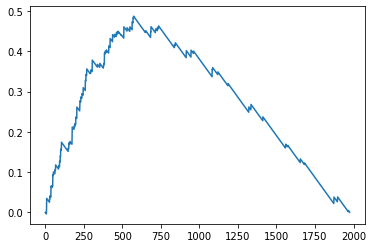

In [22]:
def enrichment_score(signal, exon_score=1):
    Nr = np.sum(signal)
    #exon_score = [1]*len(signal)
    denominator = len(signal) - np.sum(np.array(signal)>0)
    
    p_hit = []
    p_miss = []
    current_p_hit = 0
    current_p_miss = 0
    for i in range(len(signal)):
        if signal[i] > 0:
            current_p_hit += signal[i]/Nr
        else:
            current_p_miss += 1/denominator
        
        p_hit.append(current_p_hit)
        p_miss.append(current_p_miss)
        
    p_hit = np.array(p_hit)
    p_miss = np.array(p_miss)
    return p_hit-p_miss
    
def gsea(signal, permutations=2000):
    ES = np.max(enrichment_score(signal))
    ES_random = []
    for i in tqdm(range(permutations)):
        random_signal = np.random.choice(signal, len(signal), replace=False)
        ES_random.append(np.max(enrichment_score(random_signal)))
        
    ES_random = np.array(ES_random)
    p_val = (np.sum(ES_random >= ES)+1)/(permutations+1)
    return ES, p_val

plt.plot(range(len(exons_sorted)),
         enrichment_score(list(mouse_clip_overlap.loc[exons_sorted]['NOVA2'])))

In [23]:
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

def hyper_test(M, n, N, k):
    '''
    Calculates the hypergeometric test.
    
    Input:
      M: Population size (total exons tested)
      n: Successess in population (exons with p-value <= x)
      N: Sample size (exons selected)
      k: Successes in sample (selected exons with p-value <= x)
    Output:
      p_depleted: p-value of depletion from the hypergeometric test
      p_enriched: p-value of enrichment from the hypergeometric test
    '''
    hpd = hypergeom(M, n, N) # Hypergeometric distribution
    p_depleted = hpd.cdf(k)  # Get cummulative distribution up to k
    p_enriched = hpd.sf(k-1) # Survival function up to k-1 (1 - cdf(k-1))
    return p_depleted, p_enriched


def test_enrichment(binding, exon_cluster):
    M = len(binding)
    n = binding.sum()
    N = len(exon_cluster)
    k = binding.loc[exon_cluster].sum()
    p_depleted, p_enriched = hyper_test(M, n, N, k)
    
    enrichment = (k/N)/(n/M)
    
    if enrichment == 0:
        log_enrich = -3
    else:
        log_enrich = np.log2(enrichment)
        
    
    return p_enriched, p_depleted, log_enrich

In [24]:
mouse_clip_overlap

,RBFOX1,RBFOX2,RBFOX3,RBM3,SRRM4,SRSF1,SRSF2,SRSF3,SRSF4,SRSF5,...,EZH2,FMR1,LIN28A,MBNL1MBNL2,MBNL1,MBNL2,NOVA1,NOVA2,PABPC1,PTBP1
Aamdc_10,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aamdc_9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aamdc_nmdSE_2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aasdhppt_2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abat_3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zmynd8_8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Znhit1_1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zscan18_1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyx_1,0.0,0.0,0.0,0.0,0.0,0.478469,0.478469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
clip_dir = '~/Network/Mouse/SplicingNetwork/L_score_events/tiklova/'

mouse_clip_peaks = (pd.read_csv(clip_dir + 'peaks_clip_tags_overlap_len.tab', sep='\t', index_col=0) > 0).astype(int)
se_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_se']
e1_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e1']
e2_exons = [x for x in mouse_clip_peaks.index if x[-3:]=='_e2']




mouse_clip_families = pd.DataFrame()
mouse_clip_families['NOVA_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['NOVA1', 'NOVA2']].max(axis=1))
mouse_clip_families['NOVA_se'] = np.array(mouse_clip_peaks.loc[se_exons, ['NOVA1', 'NOVA2']].max(axis=1))
mouse_clip_families['NOVA_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['NOVA1', 'NOVA2']].max(axis=1))

mouse_clip_families['RBFOX_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))
mouse_clip_families['RBFOX_se'] = np.array(mouse_clip_peaks.loc[se_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))
mouse_clip_families['RBFOX_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['RBFOX1', 'RBFOX2', 'RBFOX3']].max(axis=1))

# mouse_clip_families['MBNL_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))
# mouse_clip_families['MBNL_se'] = np.array(mouse_clip_peaks.loc[se_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))
# mouse_clip_families['MBNL_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, ['MBNL1', 'MBNL2', 'MBNL1MBNL2']].max(axis=1))

mouse_clip_families['SRSF_e1'] = np.array(mouse_clip_peaks.loc[e1_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
mouse_clip_families['SRSF_se'] = np.array(mouse_clip_peaks.loc[se_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
mouse_clip_families['SRSF_e2'] = np.array(mouse_clip_peaks.loc[e2_exons, 
                                                               ['SRSF3', 'SRSF4', 'SRSF5', 'SRSF6', 'SRSF7']].max(axis=1))
# mouse_clip_families['CELF'] = mouse_clip_peaks['CELF4']#.max(axis=1)
# mouse_clip_families['TARDBP'] = mouse_clip_peaks['TARDBP']#.max(axis=1)
# mouse_clip_families['LIN28A'] = mouse_clip_peaks['LIN28A']#.max(axis=1)
mouse_clip_families.index = [x[:-3] for x in mouse_clip_peaks.index if (x[-3:]=='_se')]

modules = bwow[0]
modules = modules.loc[modules.index & mouse_clip_families.index]
mouse_clip_families = mouse_clip_families.loc[psix_results.index & mouse_clip_families.index]


# mouse_clip_predicted = (mouse_clip_predicted.loc[[x for x in mouse_clip_predicted.index if x[-3:]=='_se']] > 0).astype(int)
# mouse_clip_peaks = (mouse_clip_peaks.loc[[x for x in mouse_clip_peaks.index if x[-3:]=='_se']] > 0).astype(int)

# mouse_clip_predicted.index= [x[:-3] for x in mouse_clip_predicted.index if x[-3:]=='_se']
# mouse_clip_peaks.index= [x[:-3] for x in mouse_clip_peaks.index if x[-3:]=='_se']

hyper_enrichment = pd.DataFrame()
hyper_pval_enrich = pd.DataFrame()
hyper_pval_deplete = pd.DataFrame()
for rbp in mouse_clip_families.columns:
    p_enrich = []
    p_deplete = []
    log_enrich = []
    for module in range(1, 9):
        enrichment = test_enrichment(mouse_clip_families[rbp], modules.index[(modules==module)])
        p_enrich.append(enrichment[0])
        p_deplete.append(enrichment[1])
        log_enrich.append(enrichment[2])
        
    hyper_enrichment[rbp] = log_enrich
    hyper_pval_enrich[rbp] = p_enrich
    hyper_pval_deplete[rbp] = p_deplete
    
hyper_enrichment.index = ['Mod '+ str(x) for x in range(1, 9)]
hyper_pval_enrich.index = ['Mod '+ str(x) for x in range(1, 9)]
hyper_pval_deplete.index = ['Mod '+ str(x) for x in range(1, 9)]
    
        
hyper_enrich_significance = pd.DataFrame(multipletests(np.array(hyper_pval_enrich).reshape(1,-1)[0], 
                                                       method='fdr_bh')[1].reshape(8,-8)<=0.05)
hyper_enrich_significance.index = hyper_pval_enrich.index
hyper_enrich_significance.columns = hyper_pval_enrich.columns

labels = hyper_enrich_significance.copy()
for exon in hyper_enrich_significance.index:
    for rbp in hyper_enrich_significance.columns:
        if labels.loc[exon, rbp]:
            labels.loc[exon, rbp] = '*'
        else:
            labels.loc[exon, rbp] = ''
# from statsmodels.stats.multitest import multipletests

In [39]:
multipletests(np.array(hyper_pval_enrich).reshape(1,-1)[0], method='fdr_bh')[1]

array([2.34385512e-01, 7.34072075e-06, 4.87032424e-02, 4.30753974e-01,
       3.44694330e-02, 3.14997154e-01, 3.04082773e-01, 9.84119136e-01,
       8.74283440e-02, 1.35822563e-01, 2.13841077e-02, 2.34385512e-01,
       8.25351331e-01, 1.12490321e-01, 8.73556371e-01, 2.34385512e-01,
       6.06688620e-01, 2.04277886e-01, 3.65534435e-03, 1.04595997e-01,
       2.34916879e-01, 2.94503868e-01, 1.50236214e-01, 7.00370898e-01,
       6.88988644e-01, 9.84119136e-01, 4.14564388e-01, 1.69550958e-02,
       4.87032424e-02, 2.23875495e-02, 1.35822563e-01, 9.56156890e-01,
       1.53031800e-01, 4.24544130e-01, 1.35822563e-01, 3.18413802e-01,
       2.68707928e-01, 8.74283440e-02, 3.01364724e-02, 9.24614043e-01,
       7.09690033e-01, 3.37631579e-01, 2.34385512e-01, 3.77088420e-01,
       4.60164932e-01, 8.25351331e-01, 6.51125158e-02, 2.94503868e-01,
       1.35822563e-01, 6.30402795e-02, 9.07178951e-01, 2.23875495e-02,
       6.10384294e-03, 8.00494608e-02, 6.33603401e-01, 9.96054227e-01,
      

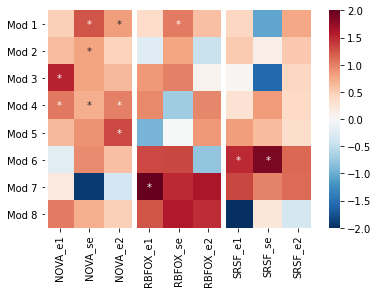

In [40]:
ax = sns.heatmap(hyper_enrichment, cmap='RdBu_r', vmin=-2, vmax=2, annot=labels, fmt='')
for i in range(0, hyper_enrichment.shape[1] + 1, 3):
    ax.axvline(i, color='white', lw=5)
# for i in range(data.shape[1] + 1):
#     ax.axvline(i, color='white', lw=60)
plt.show()

In [42]:
modules.loc[[x for x in modules.index if 'Srsf' in x]]

Srsf11_nmdSE_2   -1
Srsf2_1           5
Srsf6_1           6
Srsf6_nmdSE_1     6
Srsf7_nmdSE_1     6
Srsf9_2           3
Srsf9_nmdSE_1     3
Srsf9_nmdSE_2     3
Name: Module, dtype: int64